## Algorithmic Question

Alex and Sarah have been together for two years, and Alex is now thinking
about proposing to her. But, to surprise her, he wants to install an app on her
phone that asks her if she will marry him at the right time.


However, to install the application secretly, he needs her phone's password,
which he does not have. He knows her password is a poly-line made up of
vertical or horizontal line segments. In a 3*3 grid, each line segment
connects the centres of two cells. Alex learned the direction of each line
segment by looking at her hand while unlocking her phone. He didn't pay
much attention to the length of each line segment, but he is sure that her
phone's operating system does not allow the poly-line to intersect with itself
even at one point.


Alex wants to distract Sarah's attention long enough to test all possible
patterns based on the directions of the line segments he has learned.
Therefore, he needs you to assist him in calculating how many possible
patterns he has to try based on those directions to estimate how much time he
needs to check all of those possibilities. Given that the line segments were
directed right, down, left, and up, the following figure depicts two valid and
one invalid (as the poly-lines should not intersect even in one point) patterns.

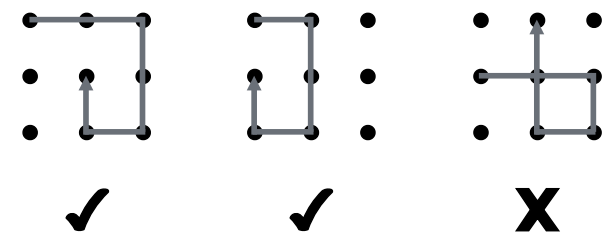

In [1]:
from IPython import display
display.Image("Examples.png")

**Input**:

The input is a single string that shows the direction of the segment lines and
contains only the characters R, L, U, and D, which correspond to the Right,
Left, Up, and Down directions. The string's maximum length is 10. It is also
guaranteed that two consecutive characters will be different.

**Output**:

We expect to see only 1 number in the output, corresponding to the number
of different patterns that can be generated based on the line segments Alex
learned. In some cases, this number may be 0, indicating that no patterns can
be generated using the learned line segments.

**Examples**:

DRU --> 15

R --> 9

LDRDRUL --> 0

In [2]:
import numpy as np

We are going to consider that all the moves can have length 1 or 2, since the length of the directions is unkown.

We will also use the varibale `pos`, to indicate where the last instruction finished.

In [3]:
def password_count(instr):     # NOTE: The comments for the 1st if and the first if inside the while are
                               # the same for the other cases, just changing right for the corresponding direction.
    counter=0 # Counter for number of possible paths
    n=len(instr)
    
    if instr[0]=='D': # If the first instruction is DOWN, we cannot start from the last row
        instr.pop(0)    # We drop the first letter
        instr2=instr.copy()
        for i in range(0,2):     # These loops move us through the different starting positions that we can have
            for j in range(0,3):
                paths=[]
                for k in range(i+1,3):
                    paths.append([[i,j],[k,j]]) # And we initialize paths where each will start from a 
                while(len(instr2)>0):           # starting point among the available ones
                    com=instr2[0]               # While there are still directions to follow, we drop that
                    instr2.pop(0)
                    if com=='R':
                        for k in paths:   # For every path, we take the last visited position and we also store a 
                            last=k[-1]    # copy for the path
                            aux=k.copy()
                            if last[1]+1<3 and [last[0],last[1]+1] not in k: #If the position moved to the right
                                k.append([last[0],last[1]+1])    # 1 step is valid and has not been visited
                                                                # We add it to the path. Same for 2 steps,
                                                                # And if the conditions are satisfied we add the 
                            if last[1]+2<3 and [last[0],last[1]+2] not in k:   #whole new path
                                aux.append([last[0],last[1]+2])
                                paths.append(aux)
                    elif com=='U':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]-1>=0 and [last[0]-1,last[1]] not in k:
                                k.append([last[0]-1,last[1]])
                            if last[0]-2>=0 and [last[0]-2,last[1]] not in k:
                                aux.append([last[0]-2,last[1]])
                                paths.append(aux)
                    elif com=='L':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]-1>=0 and [last[0],last[1]-1] not in k:
                                k.append([last[0],last[1]-1])
                            if last[1]-2>=0 and [last[0],last[1]-2] not in k:
                                aux.append([last[0],last[1]-2])
                                paths.append(aux)
                    elif com=='D':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]+1<3 and [last[0]+1,last[1]] not in k:
                                k.append([last[0]+1,last[1]])
                            if last[0]+2<3 and [last[0]+2,last[1]] not in k:
                                aux.append([last[0]+2,last[1]])
                                paths.append(aux)
                                
                instr2=instr.copy() #after the while, we put the initial directions, not the very first one, 
                                    #so we can proceed in the same way with the other initial positions 
                for k in paths:
                    if len(k)==n+1:  #If the path has the lenght =length(instr)+1, which means that it has changed the
                                    # direction n times, then we add one to the counter
                        counter+=1

    elif instr[0]=='U': # If the first instruction is UP, we cannot start from the first row
        instr.pop(0)
        instr2=instr.copy()
        for i in range(1,3):
            for j in range(0,3):
                paths=[]
                for k in range(i-1,-1,-1):
                    paths.append([[i,j],[k,j]])
                while(len(instr2)>0):
                    com=instr2[0]
                    instr2.pop(0)
                    if com=='R':
                        print('R')
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]+1<3 and [last[0],last[1]+1] not in k:
                                k.append([last[0],last[1]+1])
                            if last[1]+2<3 and [last[0],last[1]+2] not in k:
                                aux.append([last[0],last[1]+2])
                                paths.append(aux)
                    elif com=='U':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]-1>=0 and [last[0]-1,last[1]] not in k:
                                k.append([last[0]-1,last[1]])
                            if last[0]-2>=0 and [last[0]-2,last[1]] not in k:
                                aux.append([last[0]-2,last[1]])
                                paths.append(aux)
                    elif com=='L':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]-1>=0 and [last[0],last[1]-1] not in k:
                                k.append([last[0],last[1]-1])
                            if last[1]-2>=0 and [last[0],last[1]-2] not in k:
                                aux.append([last[0],last[1]-2])
                                paths.append(aux)
                    elif com=='D':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]+1<3 and [last[0]+1,last[1]] not in k:
                                k.append([last[0]+1,last[1]])
                            if last[0]+2<3 and [last[0]+2,last[1]] not in k:
                                aux.append([last[0]+2,last[1]])
                                paths.append(aux)
                instr2=instr.copy()
                for k in paths:
                    if len(k)==n+1:
                        counter+=1
                
    elif instr[0]=='R': # If the first instruction is RIGHT, we cannot start from the last column
        instr.pop(0)
        instr2=instr.copy()
        for i in range(0,3):
            for j in range(0,2):
                paths=[]
                for k in range(j+1,3):
                    paths.append([[i,j],[i,k]])
                while(len(instr2)>0):
                    com=instr2[0]
                    instr2.pop(0)
                    if com=='R':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]+1<3 and [last[0],last[1]+1] not in k:
                                k.append([last[0],last[1]+1])
                            if last[1]+2<3 and [last[0],last[1]+2] not in k:
                                aux.append([last[0],last[1]+2])
                                paths.append(aux)
                    elif com=='U':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]-1>=0 and [last[0]-1,last[1]] not in k:
                                k.append([last[0]-1,last[1]])
                            if last[0]-2>=0 and [last[0]-2,last[1]] not in k:
                                aux.append([last[0]-2,last[1]])
                                paths.append(aux)
                    elif com=='L':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]-1>=0 and [last[0],last[1]-1] not in k:
                                k.append([last[0],last[1]-1])
                            if last[1]-2>=0 and [last[0],last[1]-2] not in k:
                                aux.append([last[0],last[1]-2])
                                paths.append(aux)
                    elif com=='D':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]+1<3 and [last[0]+1,last[1]] not in k:
                                k.append([last[0]+1,last[1]])
                            if last[0]+2<3 and [last[0]+2,last[1]] not in k:
                                aux.append([last[0]+2,last[1]])
                                paths.append(aux)
                instr2=instr.copy()
                for k in paths:
                    if len(k)==n+1:
                        counter+=1
                
    elif instr[0]=='L': # If the first instruction is LEFT, we cannot start from the first column
        instr.pop(0)
        instr2=instr.copy()
        for i in range(0,2):
            for j in range(1,3):
                paths=[]
                for k in range(j-1,-1,-1):
                    paths.append([[i,j],[i,k]])
                while(len(instr2)>0):
                    com=instr2[0]
                    instr2.pop(0)
                    if com=='R':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]+1<3 and [last[0],last[1]+1] not in k:
                                k.append([last[0],last[1]+1])
                            if last[1]+2<3 and [last[0],last[1]+2] not in k:
                                aux.append([last[0],last[1]+2])
                                paths.append(aux)
                    elif com=='U':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]-1>=0 and [last[0]-1,last[1]] not in k:
                                k.append([last[0]-1,last[1]])
                            if last[0]-2>=0 and [last[0]-2,last[1]] not in k:
                                aux.append([last[0]-2,last[1]])
                                paths.append(aux)
                    elif com=='L':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[1]-1>=0 and [last[0],last[1]-1] not in k:
                                k.append([last[0],last[1]-1])
                            if last[1]-2>=0 and [last[0],last[1]-2] not in k:
                                aux.append([last[0],last[1]-2])
                                paths.append(aux)
                    elif com=='D':
                        for k in paths:
                            last=k[-1]
                            aux=k.copy()
                            if last[0]+1<3 and [last[0]+1,last[1]] not in k:
                                k.append([last[0]+1,last[1]])
                            if last[0]+2<3 and [last[0]+2,last[1]] not in k:
                                aux.append([last[0]+2,last[1]])
                                paths.append(aux)
                instr2=instr.copy()
                for k in paths:
                    if len(k)==n+1:
                        counter+=1
                
        
    return(counter)

In [4]:
txt='DRU'
instructions=[*txt]
password_count(instructions)

15

In [5]:
txt2='R'
instructions2=[*txt2]
password_count(instructions2)

9

In [6]:
txt3='LDRDRUL'
instructions3=[*txt3]
password_count(instructions3)

0